In [ ]:
import cv2   # it will allow us to load our images into the script
import numpy as np   # used for reformatting our own images
import tensorflow as tf   # main library used to load data sets, build neural networks, train them, etc.
import matplotlib.pyplot as plt   # used for visualization
from sklearn.model_selection import train_test_split

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
print('The shape of the training inputs:', X_train.shape)
print('The shape of the training labels:',y_train.shape)
print('The shape of the testing inputs:',X_test.shape)
print('The shape of the testing labels:',y_test.shape)

The shape of the training inputs: (60000, 28, 28)
The shape of the training labels: (60000,)
The shape of the testing inputs: (10000, 28, 28)
The shape of the testing labels: (10000,)


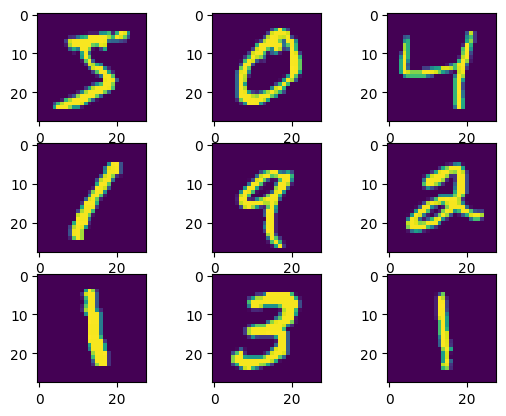

In [ ]:
# plotting the first 9 images in the train set of MNIST

fig, axs = plt.subplots(3, 3)
cnt = 0
for i in range(3):
     for j in range(3):
         axs[i, j].imshow(X_train[cnt])
         cnt += 1

In [ ]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [ ]:
# Train ve validation olarak ayıralım.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [ ]:
model = tf.keras.models.Sequential()

In [ ]:
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))   # input layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.add(tf.keras.layers.Dense(units=128, activation="relu"))   # 1st hidden layer
model.add(tf.keras.layers.Dense(units=128, activation="relu"))   # 2nd hidden layer

In [ ]:
model.add(tf.keras.layers.Dense(units=10, activation="softmax"))   # output layer

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Eğitimden önce ilk Dense katmanının ağırlıklarını al (Flatten'dan sonra gelen)
initial_weights = model.layers[1].get_weights()[0]

# En büyük mutlak değere sahip ağırlığın indeksini bul (aktif bir ağırlık seçmek için)
w_i, w_j = np.unravel_index(np.argmax(np.abs(initial_weights)), initial_weights.shape)

print(f"Takip edilen ağırlık: Giriş {w_i} → Nöron {w_j}")


Takip edilen ağırlık: Giriş 773 → Nöron 99


In [ ]:
class WeightTracker(tf.keras.callbacks.Callback):
    def __init__(self, layer_index, i, j):
        self.layer_index = layer_index
        self.i = i
        self.j = j
        self.weight_history = []

    def on_epoch_end(self, epoch, logs=None):
        weights = self.model.layers[self.layer_index].get_weights()[0]
        self.weight_history.append(weights[self.i][self.j])




In [ ]:
# Callback'i oluştur
tracker = WeightTracker(layer_index=1, i=w_i, j=w_j)

# Eğitimi başlat (önceki kodunda result = model.fit(...) kısmını güncelle)
result = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=100,
    validation_data=(X_val, y_val),
    callbacks=[tracker]
)


Epoch 1/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8162 - loss: 0.6932 - val_accuracy: 0.9430 - val_loss: 0.1882
Epoch 2/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9521 - loss: 0.1634 - val_accuracy: 0.9622 - val_loss: 0.1272
Epoch 3/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9690 - loss: 0.1080 - val_accuracy: 0.9685 - val_loss: 0.1014
Epoch 4/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9763 - loss: 0.0783 - val_accuracy: 0.9710 - val_loss: 0.0938
Epoch 5/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9820 - loss: 0.0582 - val_accuracy: 0.9730 - val_loss: 0.0845
Epoch 6/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9864 - loss: 0.0448 - val_accuracy: 0.9750 - val_loss: 0.0828
Epoch 7/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9881 - loss: 0.0370 - val_accuracy: 0.9695 - val_loss: 0.0923
Epoch 8/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9911 - loss: 0.0300 - val_accuracy: 0.

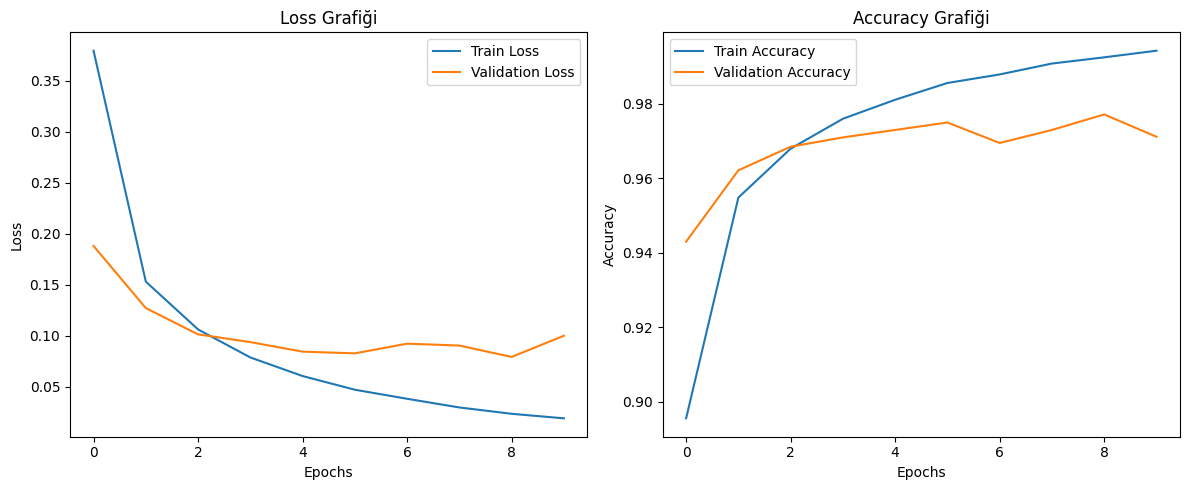

In [ ]:
# Eğitim sonuçlarını görselleştirelim
plt.figure(figsize=(12, 5))

# Loss grafiği
plt.subplot(1, 2, 1)
plt.plot(result.history['loss'], label='Train Loss')
plt.plot(result.history['val_loss'], label='Validation Loss')
plt.title('Loss Grafiği')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy grafiği
plt.subplot(1, 2, 2)
plt.plot(result.history['accuracy'], label='Train Accuracy')
plt.plot(result.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Grafiği')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

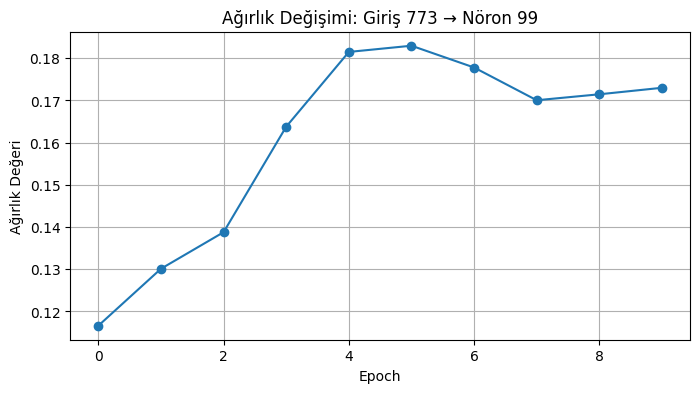

In [ ]:
# Ağırlık değişimini çiz
plt.figure(figsize=(8, 4))
plt.plot(tracker.weight_history, marker='o')
plt.title(f'Ağırlık Değişimi: Giriş {w_i} → Nöron {w_j}')
plt.xlabel('Epoch')
plt.ylabel('Ağırlık Değeri')
plt.grid(True)
plt.show()


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(loss)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9613 - loss: 0.1301
0.11533711850643158
0.9667999744415283


In [ ]:
prediction = model.predict([X_test])

 34/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step   

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(32, 28, 28))',)
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(None, 28, 28))',)
  warnings.warn(msg)


Probabilities:  [9.99994040e-01 5.29526645e-10 4.18580584e-08 8.79452067e-12
 1.00208058e-12 1.09350005e-08 6.43777923e-07 8.39163461e-11
 1.46380408e-11 5.34961919e-06]


Prediction:  0


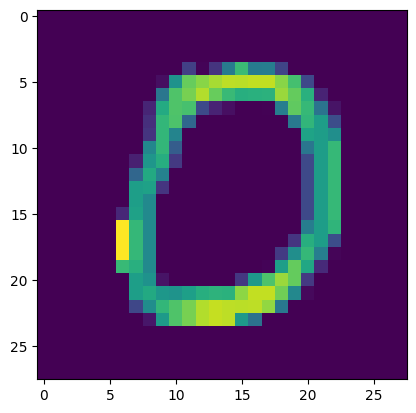

In [ ]:
# let us do prediction for single image

print('Probabilities: ', prediction[10]);
print('\n')
print('Prediction: ', np.argmax(prediction[10]))

# visualize the image

plt.imshow(X_test[10])
plt.show()

Probabilities:  [5.9423955e-09 1.2870603e-10 3.5220291e-05 9.9820387e-01 1.0894760e-10
 1.1764367e-05 1.3294068e-13 7.5372619e-10 1.7489567e-03 1.6704519e-07]


Prediction:  3


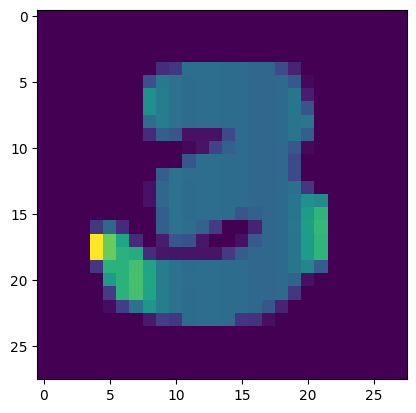

In [ ]:
# let us do prediction for single image

print('Probabilities: ', prediction[200]);
print('\n')
print('Prediction: ', np.argmax(prediction[200]))
# visualize the image

plt.imshow(X_test[200])
plt.show()

In [ ]:
# Eğitim sonrası modelin ilgili ağırlığını tekrar al
final_weights = model.layers[1].get_weights()[0]
real_weight = final_weights[w_i][w_j]

# Tracker'daki son değer ile karşılaştır
tracked_weight = tracker.weight_history[-1]

print(f"Modeldeki gerçek son ağırlık değeri: {real_weight}")
print(f"Tracker tarafından kaydedilen son ağırlık değeri: {tracked_weight}")

# Farkı kontrol edelim
print(f"Fark: {abs(real_weight - tracked_weight)}")


Modeldeki gerçek son ağırlık değeri: 0.17298932373523712
Tracker tarafından kaydedilen son ağırlık değeri: 0.17298932373523712
Fark: 0.0


In [ ]:
import numpy as np
import tensorflow as tf
import keras

In [ ]:
model.save('ysa1.keras')

In [ ]:
model = keras.models.load_model("/content/ysa1.keras")
# Test veri kümesi ile değerlendirme
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test doğruluğu: {accuracy}")